In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.utils import download_and_extract_archive
from scipy.io.arff import loadarff 

# local matplotlib seetings
colormap = ListedColormap(["#ff595e","#ffca3a","#8ac926","#52a675","#1982c4","#6a4c93"], name="Custom")

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colormap.colors)
plt.rcParams['axes.axisbelow'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


In [ ]:
dir_name = "FordA"
zip_filename = "FordA.zip"
uri = r"http://www.timeseriesclassification.com/Downloads/FordA.zip"

if "FordA" not in os.listdir():
    os.mkdir("FordA")

download_location = os.path.join(os.getcwd(), dir_name)
download_and_extract_archive(url=uri, download_root=download_location, filename=zip_filename)

In [3]:
raw_data = loadarff(r"FordA/FordA_TRAIN.arff")
df = pd.DataFrame(raw_data[0])
df["target"] = df["target"].astype(int)

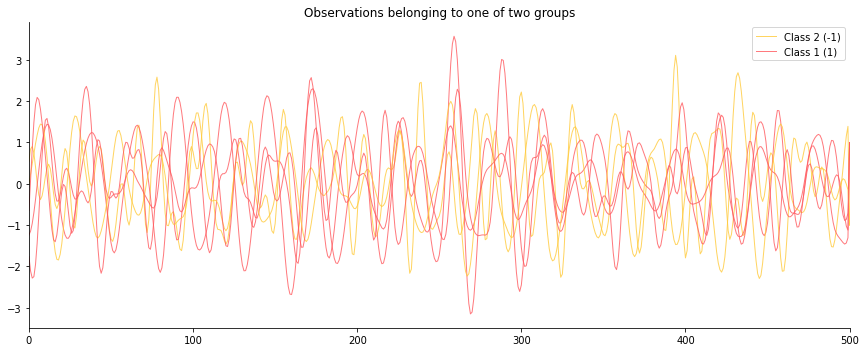

In [4]:
np.random.seed(42)

label_class_1 = "Class 1 (1)"
label_class_2 = "Class 2 (-1)"

plt.figure(figsize=(12, 5))
plt.title("Observations belonging to one of two groups")
for i in np.random.randint(0, len(df), size=(5) ):
    if df.loc[i, "target"] == 1:
        color = colormap(0)
        label = label_class_1
    else:
        color = colormap(1)
        label = label_class_2
    
    plt.plot(df.values[i], color=color, alpha=0.8, label=label, linewidth=1)
    
    if label == label_class_1:
        label_class_1 = None
    if label == label_class_2:
        label_class_2 = None
    
plt.legend()
plt.tight_layout()
plt.xlim(0, 500)
plt.show()

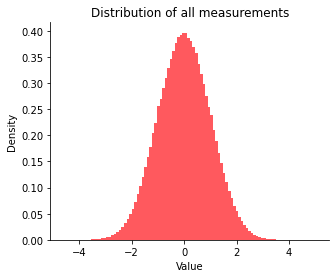

In [5]:
measurements = df.values.reshape((-1))

plt.figure(figsize=(5, 4))
plt.title("Distribution of all measurements")
plt.hist(measurements, bins=100, density=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [6]:
X = torch.Tensor(df.drop("target", axis=1).values.reshape((len(df), 1, -1)))
y = torch.Tensor(df["target"].values.reshape((-1, 1)))

train_size = 0.75
i = int(train_size * len(df))

X_train, y_train = X[:i], y[:i]
X_test, y_test = X[i:], y[i:]

In [7]:
class FordADataset(Dataset):
    def __init__(self,features, target):
        self.features = features
        self.target = target
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,idx):
        item = self.features[idx]
        label = self.target[idx]
        
        return item,label
    
train = FordADataset(X_train, y_train)
test = FordADataset(X_test, y_test)

train_loader = DataLoader(train, batch_size=16, shuffle=False)
test_loader = DataLoader(test, batch_size=16, shuffle=False)